###### vx - hardware execution

___________________
___________________
___________________

In [1]:
%load_ext autoreload
%autoreload 2

from troter_utils import *

### Quantum Devices


In [2]:
# load IBMQ Account data
provider = IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim_no_noise = QasmSimulator()

____________

## Try hardware execution with:

In [ ]:
#try
order = 1
STEP  = 4
min_t = 0.01

In [3]:
results = {"order" : [],
           "n_steps" : [],
           "t_min" : [],
           "fid_pi" : [],
           "state_tomo_fids" : [],
           "best_params" : []}




################################################################################
################################################################################
                                    Order: 1                                    
                                   # steps: 4                                   
                                 min time: 0.01                                 
################################################################################
################################################################################





/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


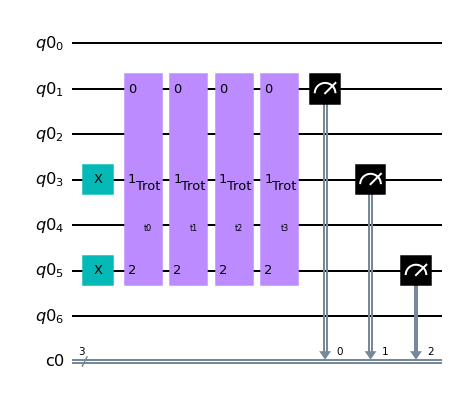

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.07405
Current parameters: [0.01  1.649 0.674 0.809] (sum to 3.14)

Iter 2 done!
Loss value: -0.13189
Current parameters: [0.043 1.692 0.534 0.872] (sum to 3.14)

Iter 3 done!
Loss value: -0.38948
Current parameters: [0.12  1.714 0.01  1.298] (sum to 3.14)

Iter 4 done!
Loss value: -0.43262
Current parameters: [0.01  1.602 0.01  1.519] (sum to 3.14)

Iter 5 done!
Loss value: -0.43332
Current parameters: [0.01  1.579 0.01  1.543] (sum to 3.14)

Iter 6 done!
Loss value: -0.43361
Current parameters: [0.01  1.56  0.01  1.562] (sum to 3.14)

Iter 7 done!
Loss value: -0.43361
Current parameters: [0.01  1.555 0.01  1.566] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.43361
            Iterations: 7
            Function evaluations: 46
            Gradient evaluations: 7

T

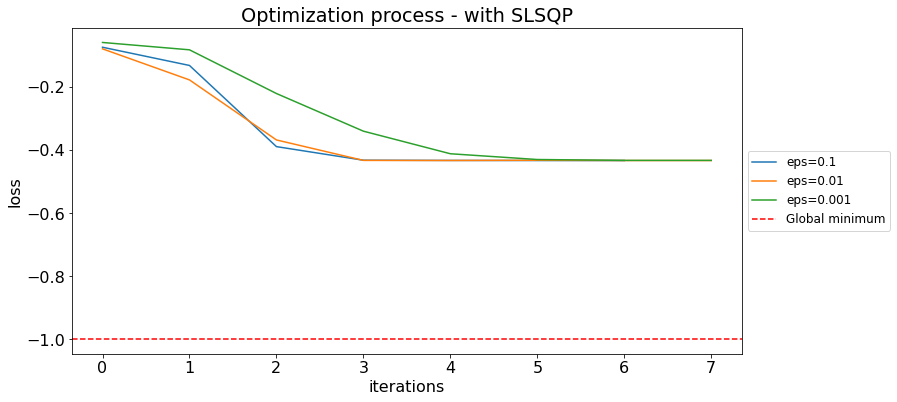


Optimization results:



,optimizer,eps,final_params,final_loss
0,slsqp,0.100,"[0.010000000000000002, 1.5596754147477152, 0.0...",-0.43361
1,slsqp,0.010,"[0.01, 1.5554139711215675, 0.01, 1.56617868246...",-0.43361
2,slsqp,0.001,"[0.034906337404973696, 1.5458424942083155, 0.0...",-0.43319


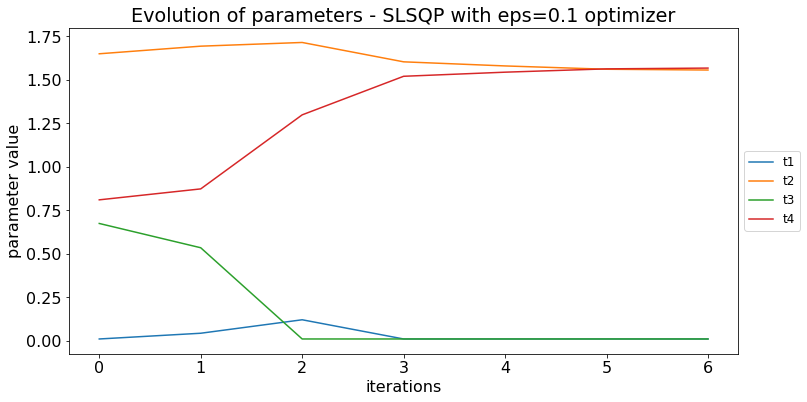

Best parameters (sum to 3.14):	[0.01  1.56  0.01  1.562]
Best parameters (sum to 1):	[0.003 0.496 0.003 0.497]


/home/askery/anaconda3/envs/qiskit/lib/python3.8/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


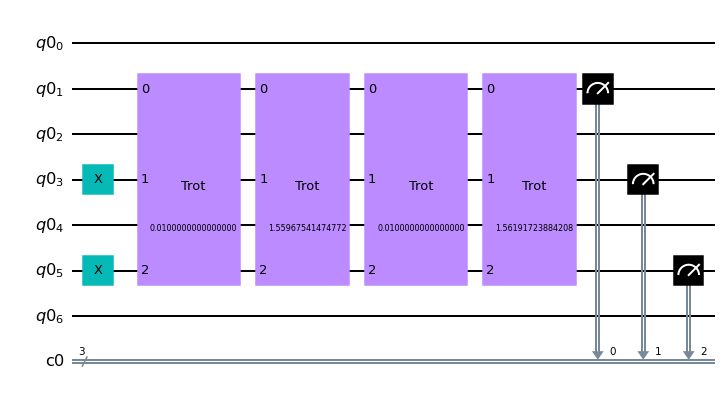

################################################################################
Single trotterization step:


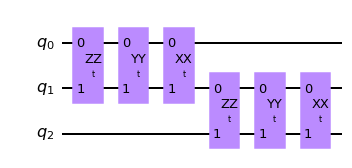

################################################################################

All steps + measurements of state tomography:


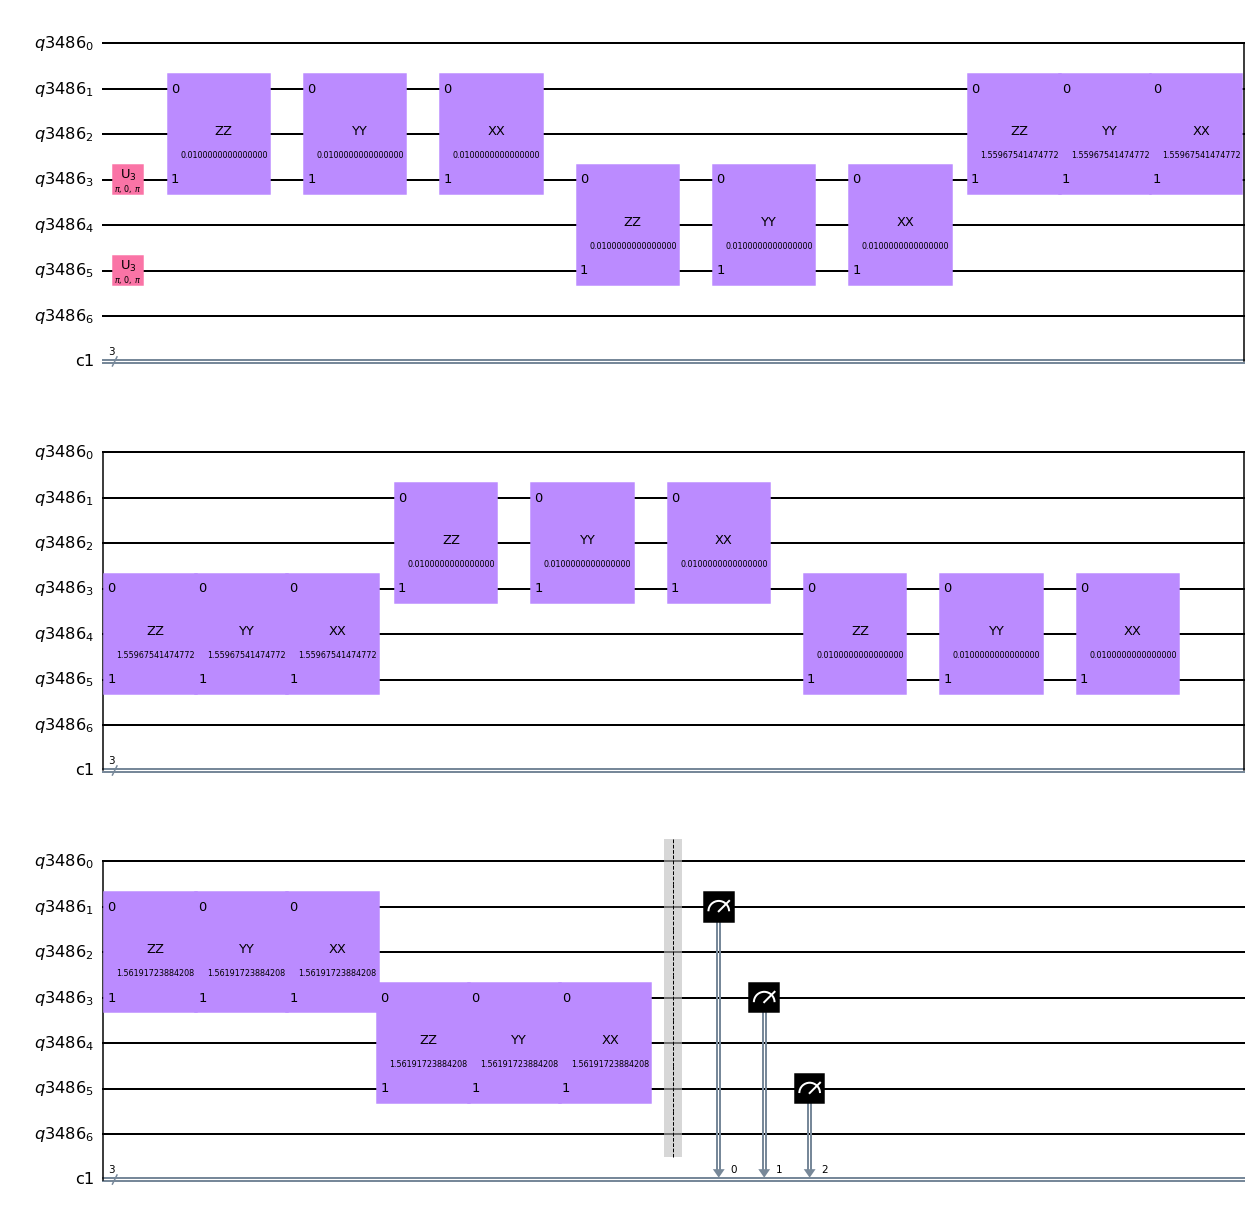

################################################################################

1/8 - Job ID 6249edcee978c730fdfb209e
2/8 - Job ID 6249edd69962254bbb8bb657
3/8 - Job ID 6249eddbf9156f2336cc034d
4/8 - Job ID 6249eddf996225012a8bb658
5/8 - Job ID 6249ede3133bfd15d95ac10a
6/8 - Job ID 6249ede8be9f6036807719b6
7/8 - Job ID 6249edec7130e1a7e35b2e54
8/8 - Job ID 6249edef99622589258bb659


In [ ]:
uniform_times = False
backend_opt, backend_state_tomo = sim_noisy_jakarta, jakarta#sim_noisy_jakarta
quadratic_loss = False

steps = range(STEP, STEP+1)
min_times = [min_t]

combs = itertools.product(steps, min_times)

for trotter_steps, params_bounds_min in combs:
    
    print("\n\n")    
    print("#"*80)
    print("="*80)
    print("#"*80)
    print(f"Order: {order}".center(80))
    print(f"# steps: {trotter_steps}".center(80))
    print(f"min time: {params_bounds_min}".center(80))
    print("#"*80)
    print("="*80)
    print("#"*80)
    print("\n\n")
    
    fids, fidelity_pi, best_params = optimize_params_and_run(order, trotter_steps, uniform_times, params_bounds_min,
                                                             backend_opt, backend_state_tomo, quadratic_loss)
    
    results['order'].append(order)
    results['n_steps'].append(trotter_steps)
    results['t_min'].append(params_bounds_min)
    results['state_tomo_fids'].append(fids)
    results['fid_pi'].append(fidelity_pi)
    results['best_params'].append(best_params)